# Unify and clean-up intersections of divided roads

Divided roads are represented by separate centerline edges. The intersection of two divided roads thus creates 4 nodes, representing where each edge intersects a perpendicular edge. These 4 nodes represent a single intersection in the real world. Roundabouts similarly create a cluster of intersections where each edge connects to the roundabout. This function cleans up these clusters by buffering their points to an arbitrary distance, merging overlapping buffers, and returning a GeoSeries of their centroids. For best results, the tolerance argument should be adjusted to approximately match street design standards in the specific street network.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
ox.config(use_cache=True, log_console=True)
%matplotlib inline
ox.__version__

'0.9'

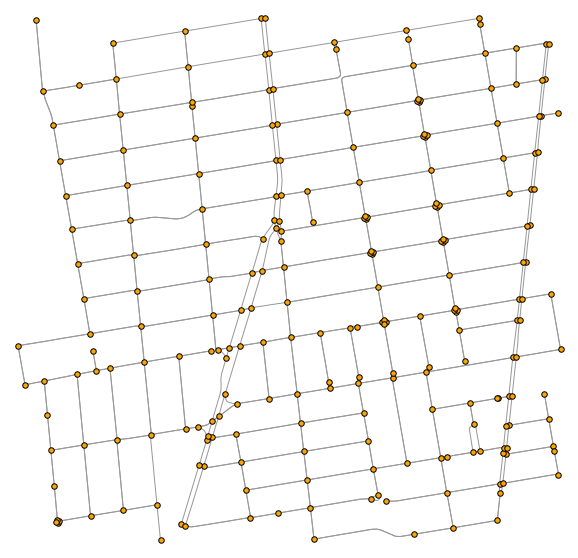

In [2]:
# get a street network and plot it with all edge intersections
address = '2700 Shattuck Ave, Berkeley, CA'
G = ox.graph_from_address(address, network_type='drive', distance=750)
G_proj = ox.project_graph(G)
fig, ax = ox.plot_graph(G_proj, fig_height=10, node_color='orange', node_size=30, 
                        node_zorder=2, node_edgecolor='k')

### Clean up the intersections

We'll specify that any nodes with 15 meters of each other in this network are part of the same intersection. Adjust this tolerance based on the street design standards in the community you are examining, and use a projected graph to work in meaningful units like meters. We'll also specify that we do not want dead-ends returned in our list of cleaned intersections. Then we extract their xy coordinates and plot it to show how the clean intersections below compare to the topological edge intersections above.

In [3]:
# clean up the intersections and extract their xy coords
intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)
points = np.array([point.xy for point in intersections])

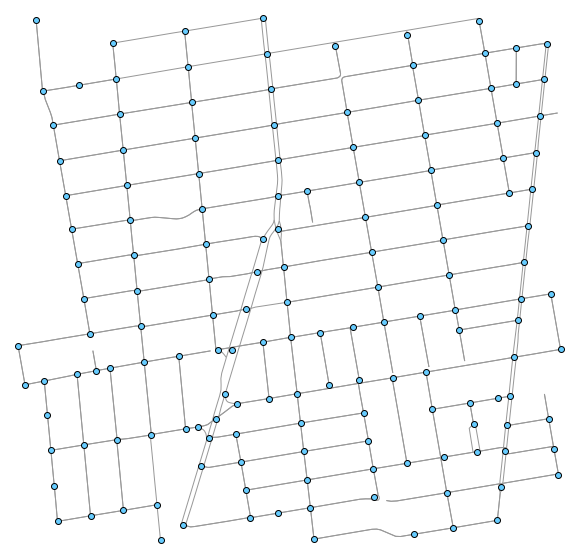

In [4]:
# plot the cleaned-up intersections
fig, ax = ox.plot_graph(G_proj, fig_height=10, show=False, close=False, node_alpha=0)
ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='k')
plt.show()

Note that these cleaned up intersections give us more accurate intersection counts and densities, but do not alter or integrate with the network's topology.